In [13]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [14]:
import sys
import tensorflow as tf

# Print Python, Driver, and TensorFlow versions
print("Python and Driver Version:", sys.version)
print("TensorFlow Version:", tf.__version__)

# Set GPU as the Default Device
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        tf.config.experimental.set_memory_growth(gpus[0], True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPU(s),", len(logical_gpus), "Logical GPU(s)")
        print("GPU set as the default device.")
    except RuntimeError as e:
        print(e)
else:
    print("No GPU available.")

# Check GPU Availability
GPU_LIST = tf.config.list_physical_devices('GPU')
print("GPU found?:", len(GPU_LIST) > 0)
print("Num GPUs Available:", len(GPU_LIST))

# Display Local Devices
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


Python and Driver Version: 3.10.9 (main, Mar  1 2023, 18:23:06) [GCC 11.2.0]
TensorFlow Version: 2.12.0
1 Physical GPU(s), 1 Logical GPU(s)
GPU set as the default device.
GPU found?: True
Num GPUs Available: 1
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 440334189069504971
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7691304960
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4153721163023680020
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


2023-05-29 16:54:22.053749: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-29 16:54:22.053845: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-29 16:54:22.053867: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-29 16:54:22.054254: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-29 16:54:22.054267: I tensorflow/core/co

In [15]:
import tensorflow as tf
import time
from tqdm import tqdm
import matplotlib.pyplot as plt

# Set Epoch and Batch Size Here
epochs = 5
batch_size = 100
##How many status bars to show
show_epochs = 1

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10),
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])
tf.debugging.set_log_device_placement(True)

# Calculate the number of steps per epoch
steps_per_epoch = len(x_train) // batch_size

# Use tqdm to create a progress bar
progress_bar = tqdm(total=epochs, desc="Training Progress")

start_time = time.time()

loss_history = []
accuracy_history = []

for epoch in range(epochs):
    # Train for one epoch
    history = model.fit(x_train, y_train, batch_size=batch_size, verbose=0)
    
    # Update the progress bar
    progress_bar.update(1)
    
    # Print information for the last show_epochs epochs
    if epoch >= epochs - show_epochs:
        print(f"Epoch {epoch+1}/{epochs} - Loss: {history.history['loss'][-1]:.4f} - Accuracy: {history.history['accuracy'][-1]:.4f}")
    
    # Append loss and accuracy to history lists
    loss_history.append(history.history["loss"][-1])
    accuracy_history.append(history.history["accuracy"][-1])

end_time = time.time()

# Close the progress bar
progress_bar.close()

total_time = end_time - start_time
avg_time_per_epoch = total_time / epochs

Training Progress: 100%|██████████████████████████████████████████████████████████████████| 5/5 [00:08<00:00,  1.75s/it]

Epoch 5/5 - Loss: 0.0943 - Accuracy: 0.9714


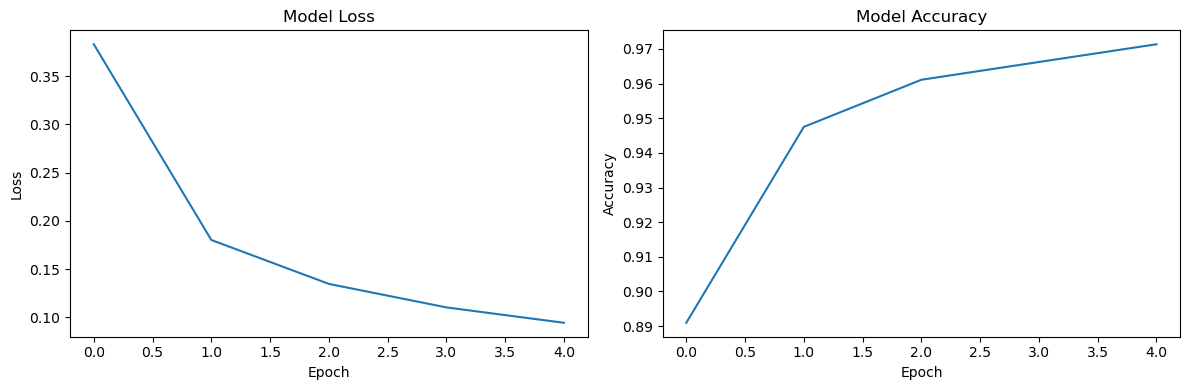

Total Training Time: 8.730076789855957 seconds
Average Time per Epoch: 1.7460153579711915 seconds
Final Loss: 0.09427955001592636
Final Accuracy: 0.9713666439056396


In [16]:
# Plotting loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.subplot(1, 2, 2)
plt.plot(accuracy_history)
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

print("Total Training Time:", total_time, "seconds")
print("Average Time per Epoch:", avg_time_per_epoch, "seconds")
final_loss = history.history["loss"][-1]
final_accuracy = history.history["accuracy"][-1]
print("Final Loss:", final_loss)
print("Final Accuracy:", final_accuracy)